In [1]:
import pandas as pd

In [2]:
import seaborn as sns, matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = (18, 6)

In [4]:
orders = pd.read_excel("orders.xlsx")

In [5]:
products = pd.read_excel("products.xlsx")

Описание данных

Таблица products:
product_id - id товара
level1 - категория
level2 - подкатегория
name - наименование товара

Таблица orders:
order_id - номер чека
accepted_at - дата и время чека
product_id - id товара
quantity - кол-во товара в чеке
regular_price - регулярная цена
price - текущая цена
cost_price - закупочная цена

1

Самая ходовая товарная группа
По какой категории товаров продано больше всего позиций?

Answer: [Молочная продукция	138]

Подкрепите свой ответ таблицей, в которой рассчитано количество проданных штук товара в каждой товарной категории.
Дополнительно постройте на основании этой таблицы barchart.
Проверьте, чтобы все подписи на вашем графике выглядели читаемо и понятно. Этот график должен быть сходу понятен стороннему наблюдателю.

My note: за кол-во позиций здесь буду принимать не общее количество штук, а кол-во уникальных продуктов

In [64]:
res1 = (
    orders["product_id"]
    .reset_index()
    .merge(products[["product_id", "level1"]])
    .groupby("level1")["product_id"]
    .agg({"nunique"})
    .sort_values("nunique", ascending=False)
    .reset_index()
)
res1.head(3)

,level1,nunique
0,Молочная продукция,138
1,Безалкогольные напитки,135
2,Бакалея,125


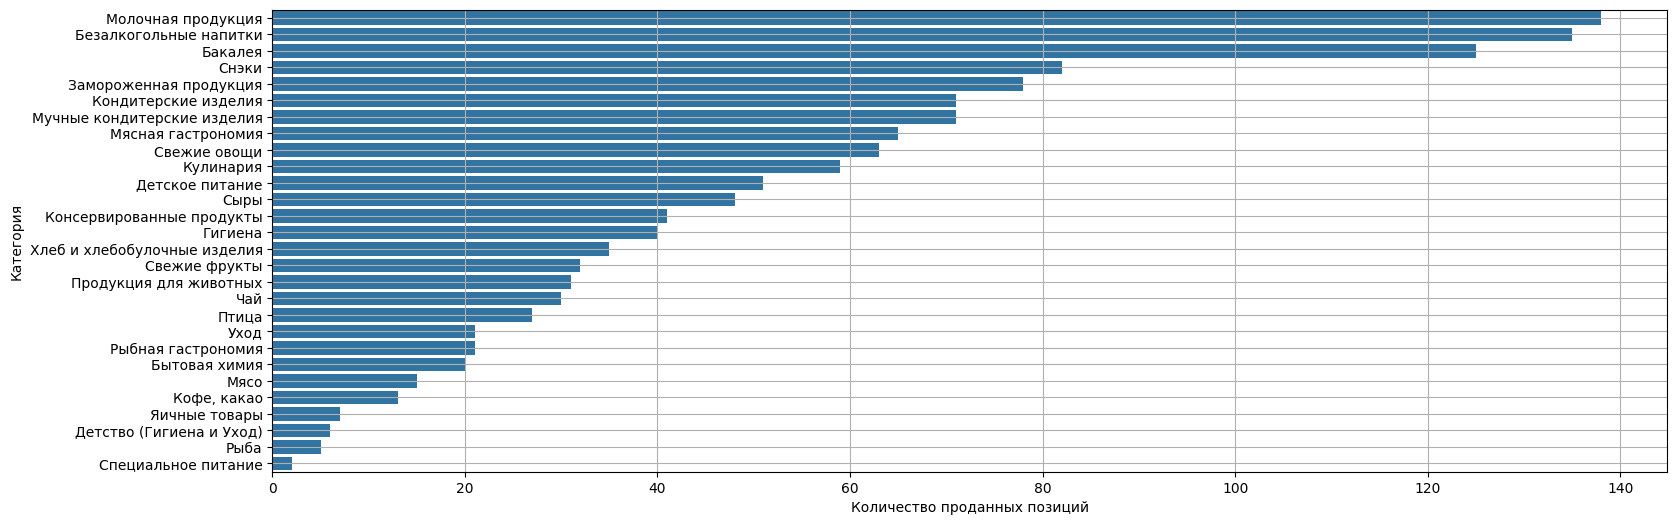

In [69]:
sns.barplot(data=res1, x="nunique", y="level1")
plt.xlabel("Количество проданных позиций")
plt.ylabel("Категория")
plt.grid()

2

Распределение продаж по подкатегориям
Оцените распределение количества проданных позиций в каждой товарной категории (level1) по подкатегориям (level2). Проиллюстрируйте свой результат расчетной таблицей.

In [71]:
orders.head(1)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74


In [72]:
products.head(1)

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...


In [122]:
res2 = (
    orders[["order_id", "product_id"]]
    .merge(products[["product_id", "level1", "level2"]])
    .groupby(["level1", "level2"])["product_id"]
    .agg({"nunique"})
    .reset_index()
    .sort_values(["level1", "nunique"], ascending=[True, False])
)
res2[res2["level1"] == "Молочная продукция"]
res2.head(21)

,level1,level2,nunique
3,Бакалея,"Крупы, бобовые",20
4,Бакалея,Макаронные изделия,20
9,Бакалея,Соусы,20
1,Бакалея,Зерновые для завтраков,15
6,Бакалея,Пряности,14
2,Бакалея,Ингредиенты для готовки,7
7,Бакалея,Растительные масла,7
0,Бакалея,Все для суши,6
5,Бакалея,Мука и мучные смеси,6
10,Бакалея,Сухие блюда быстрого приготовления,6


3

Найти средний чек в заданную дату
Какой средний чек был 13.01.2022?

Answer: 978.73

In [113]:
req_date = "13.01.2022"
filtered_orders = orders[
    orders["accepted_at"].dt.date == pd.to_datetime("2022-01-13").date()
]
orders_total_sum = (
    filtered_orders.groupby("order_id")[["quantity", "regular_price"]]
    .apply(lambda x: sum(x["quantity"] * x["regular_price"]))
    .reset_index(name="total_sum")
    .sort_values("total_sum")
    .reset_index(drop=True)
)
orders_total_sum.head(3)

,order_id,total_sum
0,1517684904,179
1,1517416238,179
2,1517689296,186


In [119]:
orders_total_sum.describe()

,order_id,total_sum
count,5.440000e+02,544.000000
mean,1.517530e+09,978.726103
std,1.040983e+05,814.784901
min,1.517207e+09,179.000000
25%,1.517453e+09,417.000000
50%,1.517530e+09,729.000000
75%,1.517609e+09,1234.500000
max,1.517855e+09,5887.000000


In [123]:
# на всякий случай еще так
orders_total_sum["total_sum"].mean()

978.7261029411765

In [115]:
# из интереса найду медианный чек за дату
median_index = len(orders_total_sum) // 2
median_order = orders_total_sum.iloc[median_index]
median_order

order_id     1517585633
total_sum           730
Name: 272, dtype: int64